In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.DataFrame({'client_id': [9002, 6722, 8799, 8737, 5208] \
                   , 'sex': [1, 1, 1, 0, 0] \
                   , 'wealth': ['medium', 'high', 'high', 'low', 'medium'] \
                   , 'age': [63, 54, 52, 54, 37]})

In [9]:
medium_35 = df.query("wealth == 'medium' and age > 35")
medium_35.head()

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [6]:
medium_3 = df[(df.wealth == 'medium') & (df.age > 35)]

In [7]:
medium_3.head()

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [12]:

data = pd.read_csv('https://stepik.org/media/attachments/lesson/359209/companies.csv', sep=';')
data.head()


,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [18]:
def read_n_agg(path):
    data = pd.read_csv(path, sep=';')
    result = data.groupby('company').agg({'income':'mean'})
    return result

In [19]:
df = read_n_agg('https://stepik.org/media/attachments/lesson/359209/companies.csv')
df.head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


In [50]:
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [21]:
orders_df = taxi.groupby('source', as_index=False).agg({'start_type':'count'}).rename(columns= {'start_type':'count_orders'})

In [35]:
orders_df.head()

,source,count_orders,pers_orders
0,Android,4909,21.354620
1,Wap,136,0.591613
2,iPad,571,2.483905
3,iPhone,9741,42.374282
4,web,7631,33.195580


In [34]:
orders_df['pers_orders'] = orders_df.count_orders / orders_df.count_orders.sum() * 100 

In [43]:
orders_df.sort_values('count_orders', ascending=False)

,source,count_orders,pers_orders
3,iPhone,9741,42.374282
4,web,7631,33.195580
0,Android,4909,21.354620
2,iPad,571,2.483905
1,Wap,136,0.591613


In [83]:
driver_score_counts = pd.DataFrame(taxi.driver_score.value_counts(normalize=True).mul(100).round(2).\
        reset_index().rename(columns={'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score'))

In [84]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


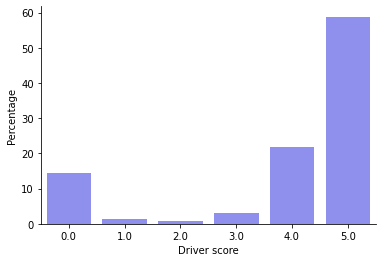

In [86]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [95]:
rider_score_counts = pd.DataFrame(taxi.rider_score.value_counts(normalize=True).mul(100).round(2).reset_index().sort_values('index') )

In [96]:
rider_score_counts

,index,rider_score
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


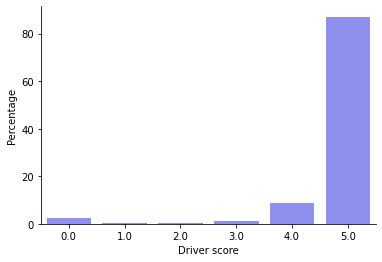

In [98]:
ax = sns.barplot(x='index', y='rider_score', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
(taxi.driver_score.value_counts(normalize=True).mul(100).round(2).\
        reset_index().rename(columns={'index':'driver_score','driver_score':'percentage'}).sort_values('driver_score'))